In [127]:
%store -r data_df

In [128]:
data_df.head()

,HAGRID,Order,Female maturity,Male maturity,Birth weight,Adult weight,Longevity,Origin,Metabolic rate,Body mass,...,Class_Magnoliopsida,Class_Mammalia,Class_Pinopsida,Class_Reptilia,Class_Rhabditophora,Class_Saccharomycetes,Class_Schizosaccharomycetes,Class_Sordariomycetes,Class_Teleostei,Class_Trepaxonemata
0,36.0,Anura,2.493151,2.493151,11.450084,0.021767,36.0,0,0.008290,21.600000,...,False,False,False,False,False,False,False,False,False,False
1,37.0,Anura,3.000000,3.000000,11.450084,176.331211,11.5,0,0.008144,21.333333,...,False,False,False,False,False,False,False,False,False,False
2,38.0,Anura,4.000000,3.500000,11.450084,176.331211,8.0,2,0.007999,21.066667,...,False,False,False,False,False,False,False,False,False,False
3,39.0,Anura,5.000000,4.000000,11.450084,176.331211,15.0,2,0.007853,20.800000,...,False,False,False,False,False,False,False,False,False,False
4,40.0,Anura,2.000000,2.000000,11.450084,176.331211,10.7,0,0.007708,20.533333,...,False,False,False,False,False,False,False,False,False,False


<Axes: ylabel='HAGRID'>

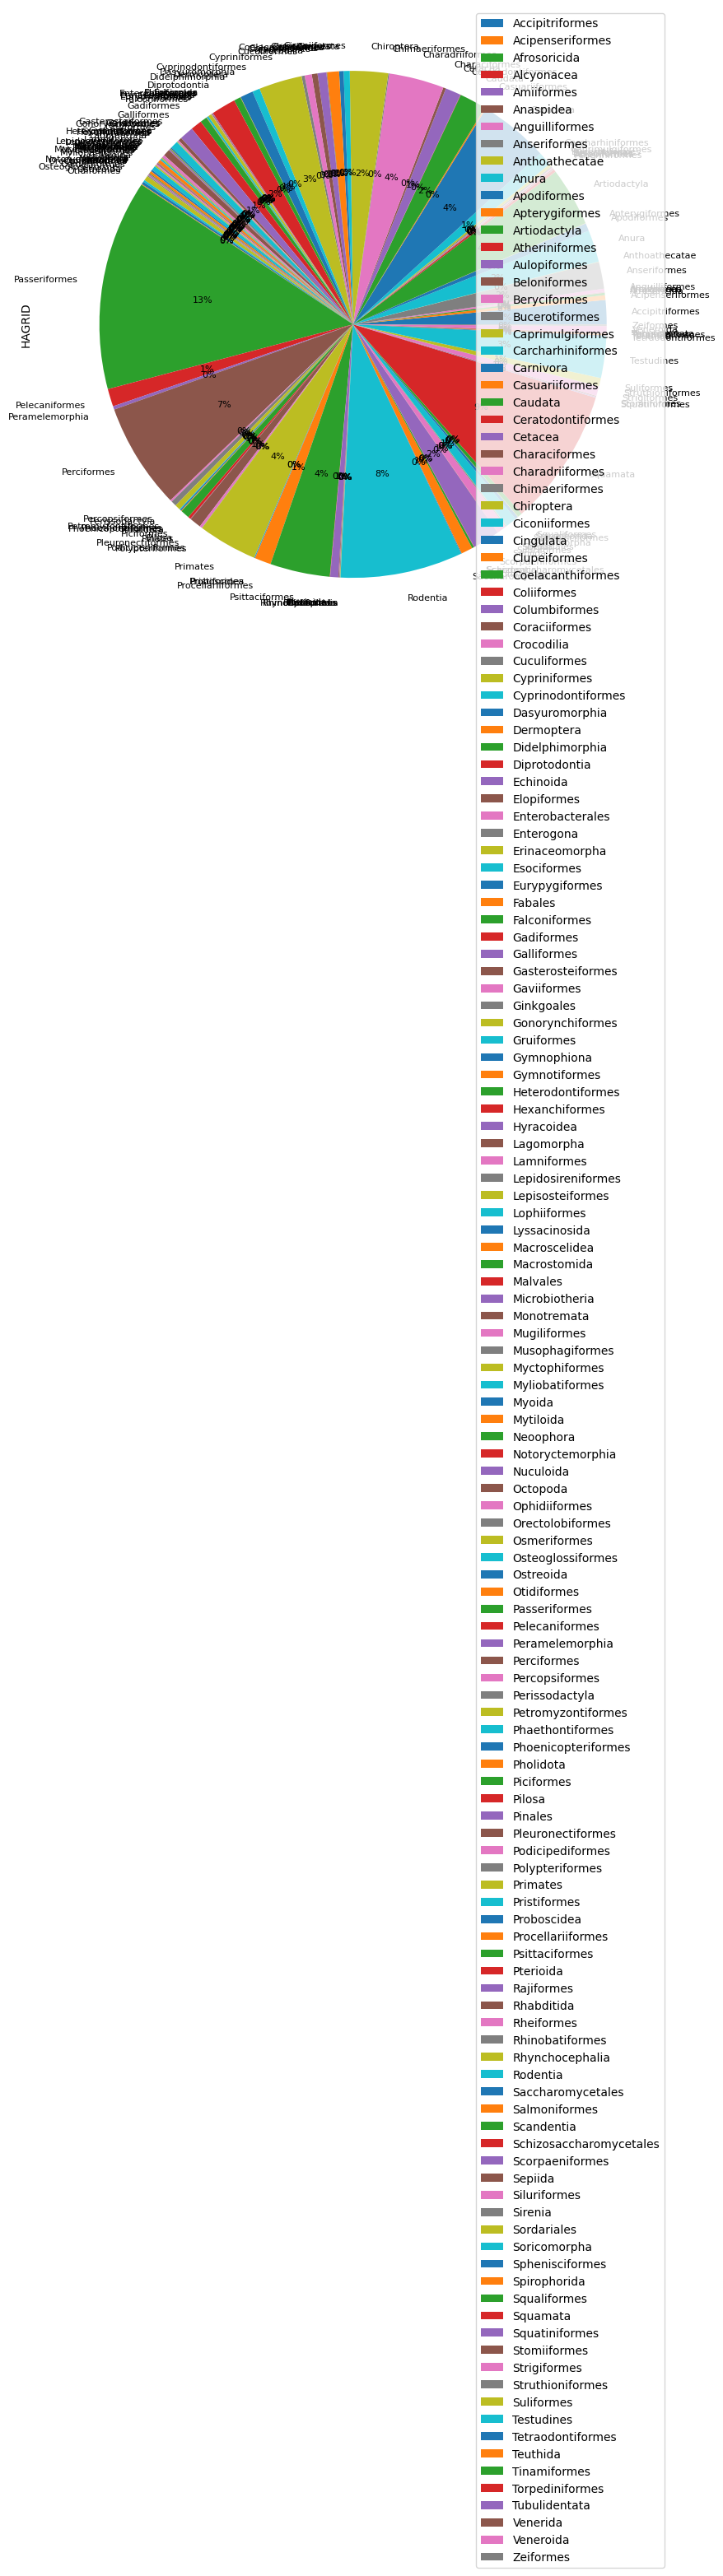

In [130]:
species_order = data_df.groupby('Order').count()
species_order.plot(kind='pie',y='HAGRID',autopct='%1.0f%%', figsize = (10,10), fontsize = 8)

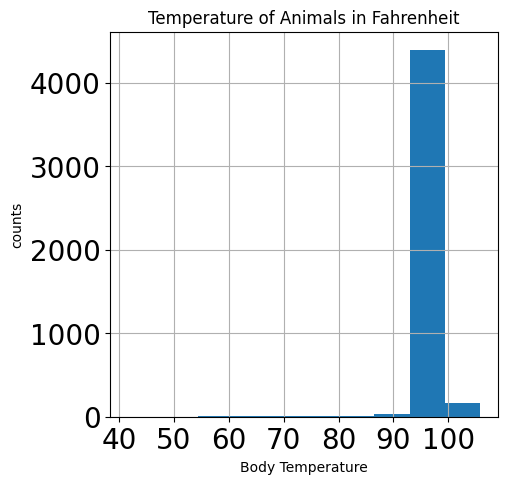

In [131]:
plt.figure(figsize=[5,5])
plt.hist(data_df['Temperature'])
plt.xlabel("Body Temperature")
plt.ylabel("counts")
plt.title("Temperature of Animals in Fahrenheit")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

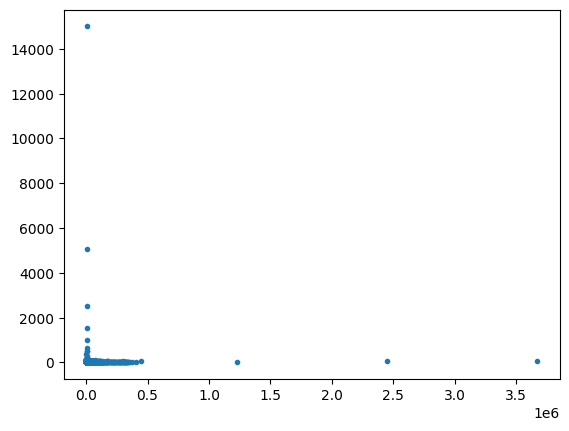

In [132]:
plt.plot(data_df['Body mass'],data_df['Longevity'],'.')

# Clustering

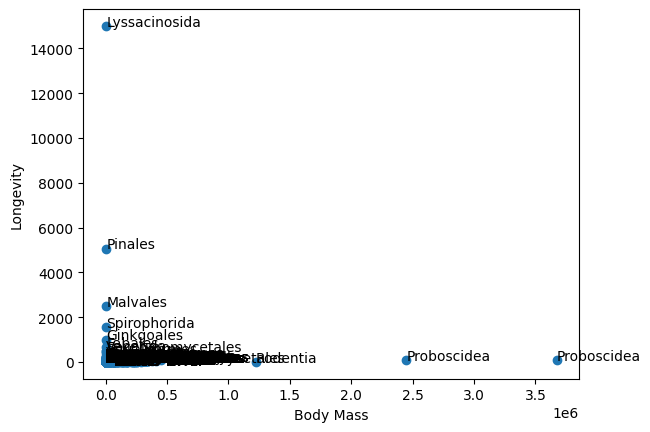

<Figure size 500x500 with 0 Axes>

In [65]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

data_df.dropna(subset=['Longevity'], inplace=True)

X = data_df.drop('Order',axis=1)
y = data_df['Order']

plt.scatter(X['Body mass'],X['Longevity'])
for i, txt in enumerate(y):
    plt.annotate(txt, (X['Body mass'][i],X['Longevity'][i]))

plt.xlabel('Body Mass')
plt.ylabel('Longevity')

p = plt.figure()
p.set_figwidth(5) 
p.set_figheight(5)

plt.show()

In [134]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

C:\Users\wwgid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

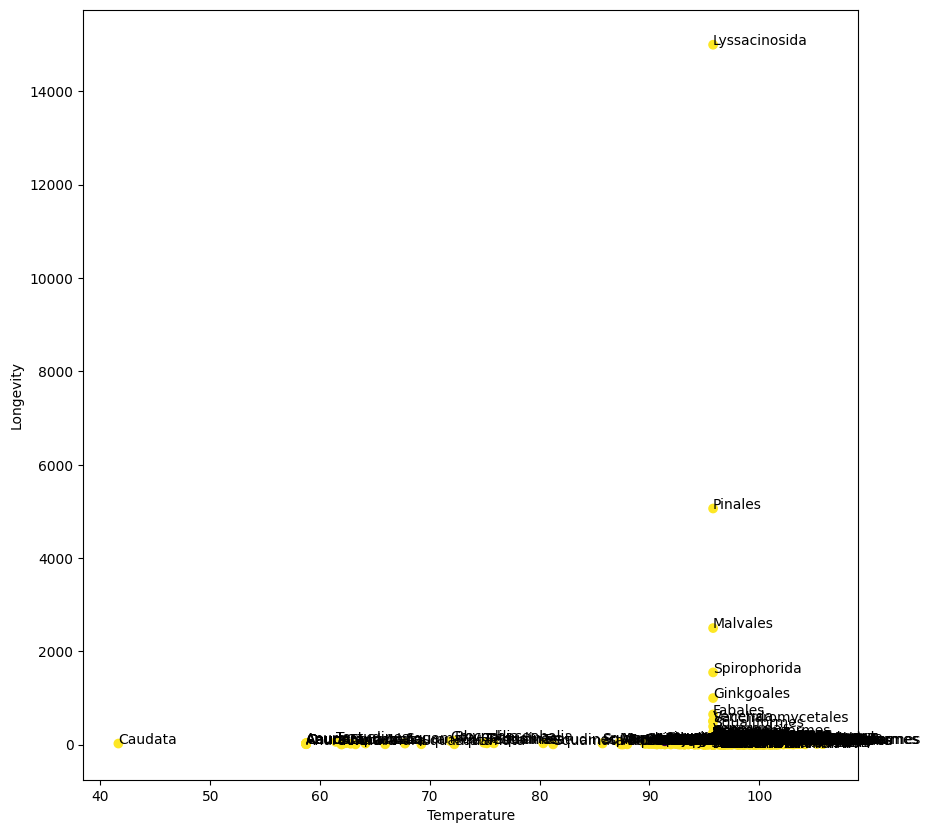

In [135]:
plt.figure(figsize = (10,10))
plt.scatter(X['Temperature'],X['Longevity'],c=cluster.labels_)
for i, txt in enumerate(y):
    plt.annotate(txt,(X['Temperature'][i],X['Longevity'][i]))

plt.xlabel('Temperature')
plt.ylabel('Longevity')
plt.show()

# Random Forest

In [129]:
data_df = data_df.drop(['Order'], axis = 1)
data_df = data_df.drop(['HAGRID'], axis = 1)

In [130]:
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_df['Longevity'] = pd.cut(x=data_df['Longevity'], bins=[0, 10, 10000], 
                     labels=['Long', 'Short'])

longevity_map = {'Long':1,'Short':0}
data_df['Longevity'] = data_df['Longevity'].map(longevity_map)

data_df.dropna(subset=['Longevity'], inplace=True)

X = data_df.drop('Longevity', axis=1)
y = data_df['Longevity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3,
                                                    random_state=32)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=32)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7626262626262627

In [132]:
predictions = rf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       940
           1       0.66      0.54      0.59       446

    accuracy                           0.76      1386
   macro avg       0.73      0.70      0.71      1386
weighted avg       0.75      0.76      0.76      1386



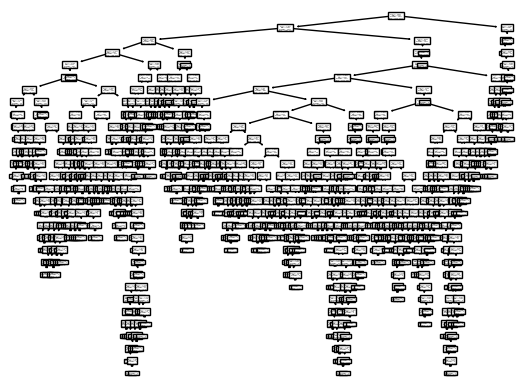

In [76]:
tree_100 = rf.estimators_[99]
tree.plot_tree(tree_100)
plt.savefig("rf_tree.svg")

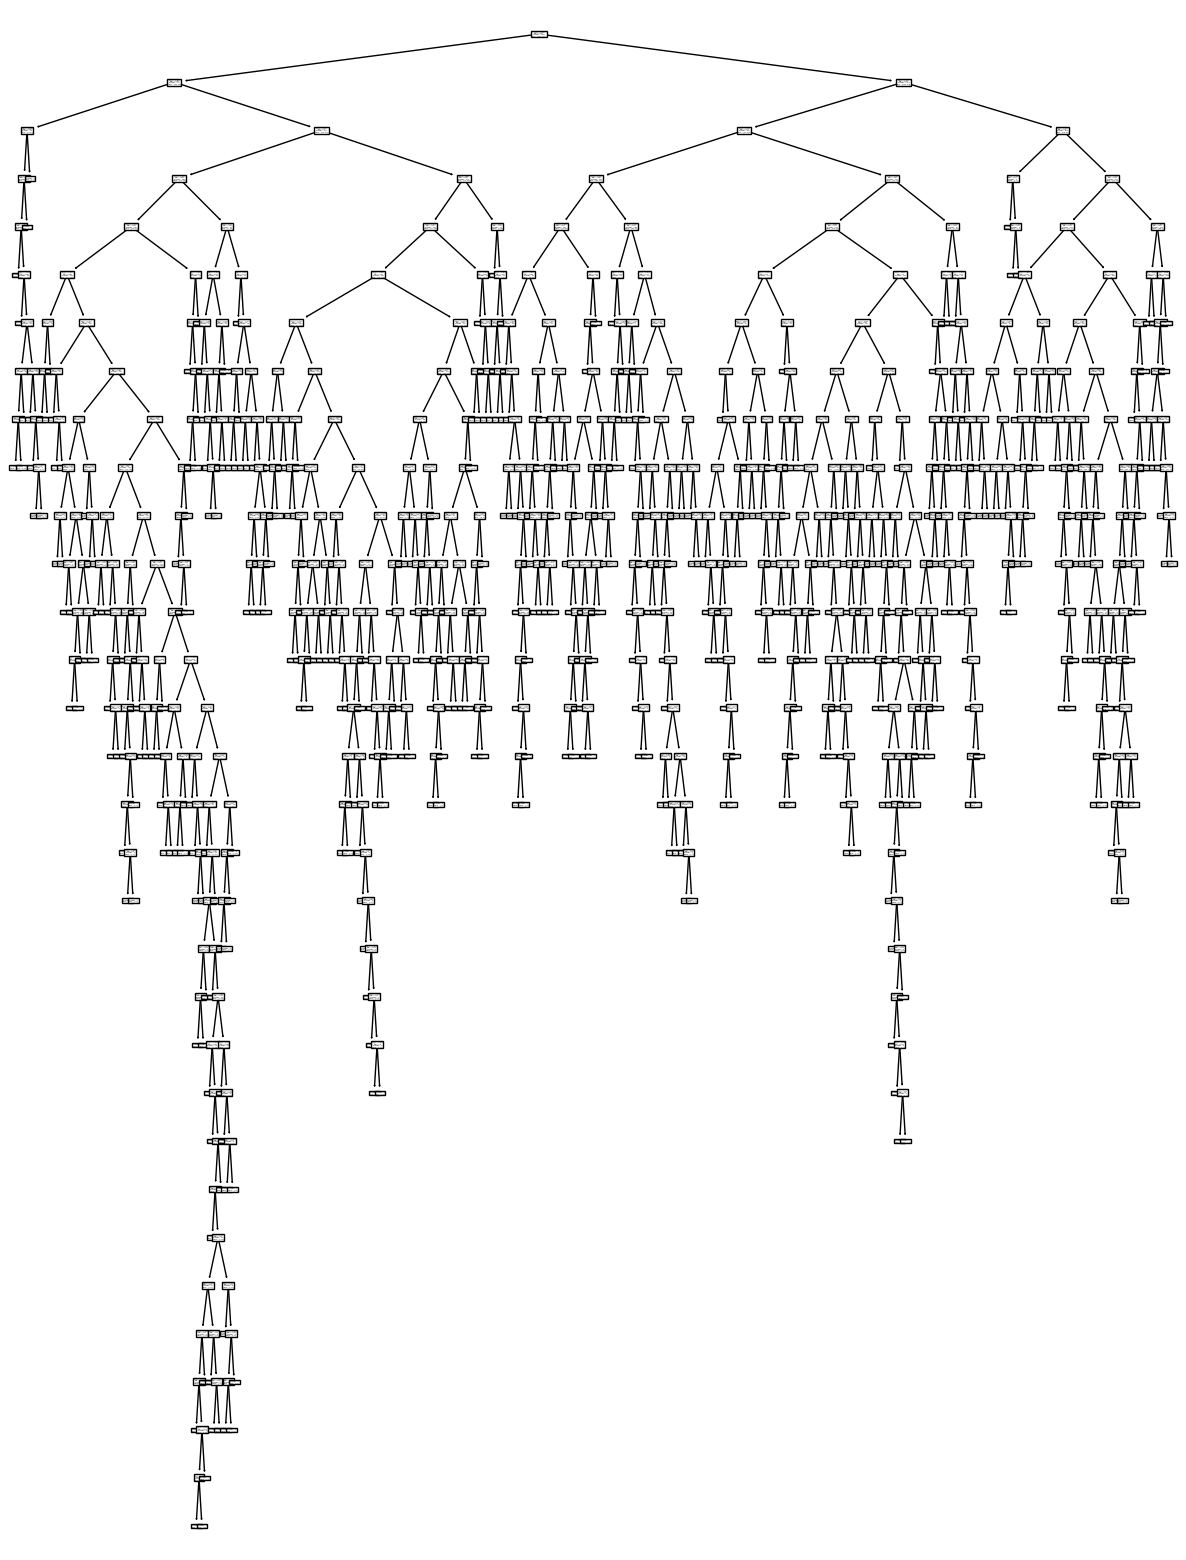

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=32, max_features=20, n_jobs=-1, min_samples_leaf=1)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
predictions = rf.predict(X_test)
trees = rf.estimators_[32]
plt.figure(figsize=(15, 20)) 
tree.plot_tree(trees)
plt.savefig("rf_tree.svg")

In [133]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       940
           1       0.62      0.41      0.49       446

    accuracy                           0.73      1386
   macro avg       0.69      0.64      0.65      1386
weighted avg       0.71      0.73      0.71      1386



In [134]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
auc

0.6433403301211718

Text(0, 0.5, 'True Positive Rate')

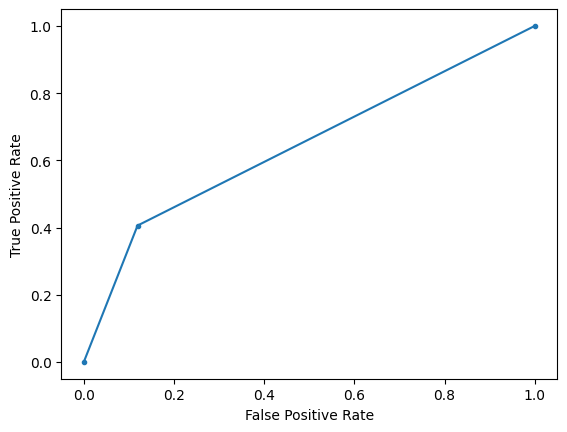

In [135]:
plt.plot(fpr, tpr, marker = ".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [137]:
from sklearn.metrics import precision_recall_curve, f1_score, auc

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f1

0.489851150202977

In [138]:
pr_auc = auc(recall, precision)
pr_auc

0.6073873639416425

Text(0, 0.5, 'Precision')

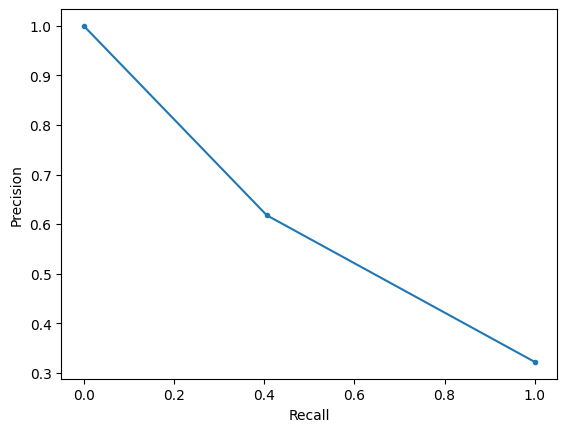

In [139]:
plt.plot(recall, precision, marker = ".")
plt.xlabel('Recall')
plt.ylabel('Precision')

<Axes: >

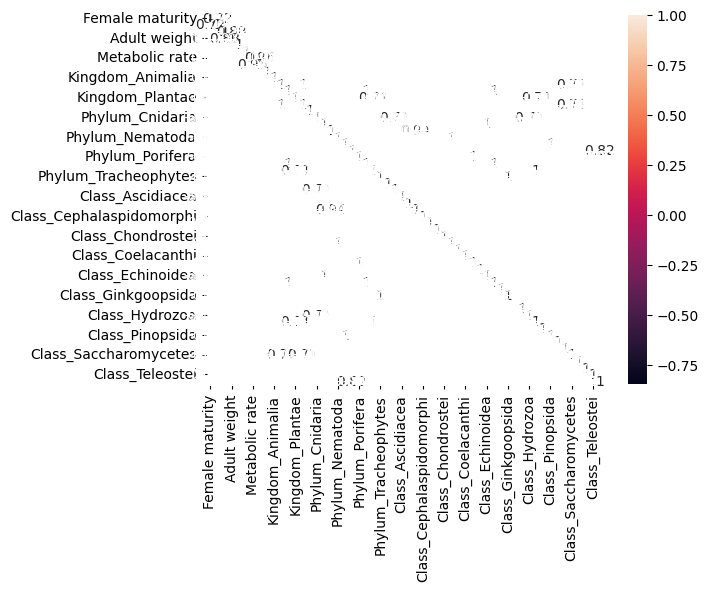

In [40]:
import seaborn as sns
correlation = data_df.corr()
sns.heatmap(correlation, annot=True,linewidths=20)

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data_df[['Body mass','Temperature']]
y = data_df['Longevity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred = regression.predict(X_test)
y_pred

array([0.31976339, 0.3156641 , 0.31920164, ..., 0.3156641 , 0.31942572,
       0.31546593])

In [142]:
accuracy_score = abs(regression.score(X_test, y_test))
accuracy_score

0.012047358958496512

In [113]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=32)
X_undersampled, y_undersampled = cc.fit_resample(X_train, y_train)

C:\Users\wwgid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [114]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression
model = lr(random_state = 32, max_iter = 1000)
model.fit(X_undersampled, y_undersampled)

LogisticRegression(max_iter=1000, random_state=32)

In [115]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

bac = balanced_accuracy_score
y_pred = model.predict(X_test)
bac(y_test, y_pred)

0.5739837250368645

In [116]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.16      0.99      0.27      0.40      0.15       337
          1       0.36      0.99      0.16      0.53      0.40      0.17       163

avg / total       0.77      0.43      0.72      0.36      0.40      0.15       500



# Oversampling

In [117]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=32)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [118]:
#train using resampled data
model = LogisticRegression(random_state = 32, max_iter = 500)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=500, random_state=32)

In [119]:
from sklearn.metrics import balanced_accuracy_score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5088474631810818

# Undersampling

In [120]:
from imblearn.under_sampling import ClusterCentroids
rus = ClusterCentroids(random_state=32)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

C:\Users\wwgid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [121]:
model = LogisticRegression(random_state = 32)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=32)

In [122]:
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5739837250368645

In [123]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.16      0.99      0.27      0.40      0.15       337
          1       0.36      0.99      0.16      0.53      0.40      0.17       163

avg / total       0.77      0.43      0.72      0.36      0.40      0.15       500

